In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import SpectralCoclustering

In [142]:
# data = pd.read_table("./GSE60361_C1-3005-Expression.txt", index_col=0)
# cell_types = pd.read_table("./zeisel_cell_types.txt", header=None).iloc[:, 0].values
# cell_names = pd.read_table("./zeisel_cell_labels.txt").columns.values
# data = data[cell_names]

data = pd.read_csv("./zeisel_counts.csv", index_col=0)
# cell_types = pd.read_table("./zeisel_cell_types.txt", header=None).iloc[:, 0].values
# cell_names = pd.read_table("./zeisel_cell_labels.txt").columns.values
# data = data[cell_names]

In [143]:
data.head()

,Tspan12,Tshz1,Fnbp1l,Adamts15,Cldn12,Rxfp1,X2310042E22Rik,Sema3c,Jam2,Apbb1ip,...,Tceanc,Msl3,Arhgap6,Mid1,Vamp7,Tmlhe,Zf12,Kdm5d,Uty,Gm20826_loc2
1772071015_C02,0,3,3,0,1,0,0,11,1,0,...,0,0,0,0,5,0,0,0,0,0
1772071017_G12,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1772071017_A05,0,0,6,0,1,0,2,25,1,0,...,0,2,0,0,3,0,0,0,7,0
1772071014_B06,3,2,4,0,0,0,3,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1772067065_H06,0,2,1,0,0,0,0,10,0,0,...,0,4,0,0,3,0,0,0,0,0


In [144]:
cell_types = pd.read_csv("./zeisel_types.csv", index_col=0)
cell_types

,cell.id,cell.type
1,1772071015_C02,interneurons
2,1772071017_G12,interneurons
3,1772071017_A05,interneurons
4,1772071014_B06,interneurons
5,1772067065_H06,interneurons
...,...,...
3001,1772067059_B04,endothelial
3002,1772066097_D04,endothelial
3003,1772063068_D01,endothelial
3004,1772066098_A12,endothelial


In [154]:
NUM_GENES = 300
gene_variances = data.var(0).values
sorted_idx = np.argsort(-gene_variances)[:NUM_GENES]
data_filtered = data.iloc[:, sorted_idx]

In [155]:
data_filtered.shape

(3005, 300)

In [156]:

data_standardized = np.log(data_filtered.values + 1)
# data_standardized = (data_standardized.T / data_standardized.sum(1)).T
data_standardized = (data_standardized - data_standardized.mean(0)) / data_standardized.std(0)

In [157]:
pca = PCA(n_components=30)
data_reduced = pca.fit_transform(data_standardized)

In [158]:
tsne = TSNE()
data_reduced_tsne = tsne.fit_transform(data_reduced)

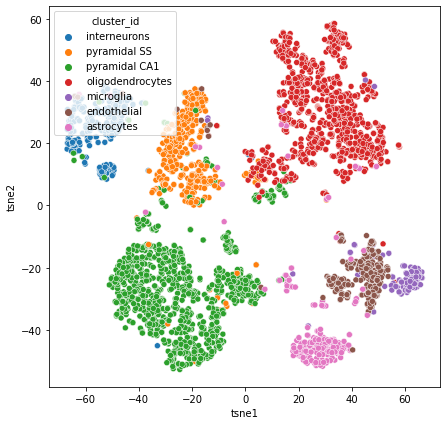

In [159]:
plot_df = pd.DataFrame(data_reduced_tsne, columns=['tsne1', 'tsne2'])
plot_df['cluster_id'] = cell_types["cell.type"] #cell_types.astype(str)
plt.figure(figsize=(7, 7))
sns.scatterplot(data=plot_df, x='tsne1', y='tsne2', hue='cluster_id')
plt.show()

In [160]:
data_reduced.shape

(3005, 30)

In [161]:
data_filtered.to_csv("zeisel_data_for_prrr.csv")

In [162]:
data_filtered.shape

(3005, 300)